# Problem Statement - Market Risk Analysis - Indian Stock Market

The project aims to analyze the stock price movements of 10 Indian stocks over a 6-year period to calculate average returns and volatility, using logarithmic returns. The goal is to identify high-return, low-risk stocks while providing insights into overall market risk for informed investment decisions.

**Objectives:**
* Calculate and analyze average returns and volatility for each stock.
* Visualize stock price trends and stock returns using scatter plots.
* Compare stock performance to identify high-return and low-risk stocks.
* Use logarithmic returns for accurate long-term stock performance analysis.
* Provide business recommendations for investors based on risk-return trade-offs.


# Index
* <a href = #lel>Load Essential Libraries</a>
* <a href = #ld>Loading Dataset</a>
* <a href = #do>Data Overview</a>
* <a href = #eda>Exploratory Data Analysis (EDA)</a>
  * <a href = #eda02>Q1: Draw Stock Price Graph</a>
  * <a href = #eda01>Stock movement over time</a>
* <a href = #ars>Q2: Analyzing Returns on Stocks</a>
* <a href = #msd>Q3: Means and Standard Deviation of Stock Returns</a>
* <a href = #psmsd>Q4: Plot for Stock Means vs Standard Deviation</a>
* <a href = #cr>Q5: Conclusion and Recommendations</a>

# <a name='lel'>Load Essential Libraries</a>

In [1]:
# Libraries for Data Manipulation and Numerical Operations
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# Set pandas display options for better readability of output
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Libraries for Data Visualization
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualizations

# Set Seaborn aesthetic parameters
sns.set(
    context='notebook',
    style='darkgrid',
    font='sans-serif',
    font_scale=1,
    rc={'figure.figsize': (20, 10)}
)

# Sci-Kit Learn Libraries for Model Evaluation
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# <a name='ld'>Loading Dataset</a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/Colab Notebooks/FRA/Project 2/Market+Risk+Dataset.csv'
df_stockdata = pd.read_csv(data_path)

# <a name='do'>Data Overview</a>
* Display Top and Bottom 5 Rows
* Clean-up Column Names
* Show Dataset Shape and Dataset Information
* Show Statistics for Numerical Fields
* Create New Column with DateType DateTime and Show Statistics
* Check for Duplicates and Missing Values


## Display Top 5 Rows

In [4]:
# Top 5 Rows
df_stockdata.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


## Cleaning up Column Name to make it suitatble for further analysis

In [5]:
# Replace Spaces (' ') with Underscore and remove Special Characters ('&') from Column Names.
df_stockdata.columns = df_stockdata.columns.str.replace(' ', '_').str.replace('_&_', '_')

## Display Bottom 5 Rows, with cleaned-up dataset columns

In [6]:
# Show Bottom 5 Rows
df_stockdata.tail()

,Date,Infosys,Indian_Hotel,Mahindra_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


## Show Dataset Shape

In [7]:
# Shape of the dataset
print(f'The number of rows is {df_stockdata.shape[0]},\nThe number of columns is {df_stockdata.shape[1]}.')

The number of rows is 314,
The number of columns is 11.


## Dataset Information

In [8]:
# Display Dataset Information
df_stockdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               314 non-null    object
 1   Infosys            314 non-null    int64 
 2   Indian_Hotel       314 non-null    int64 
 3   Mahindra_Mahindra  314 non-null    int64 
 4   Axis_Bank          314 non-null    int64 
 5   SAIL               314 non-null    int64 
 6   Shree_Cement       314 non-null    int64 
 7   Sun_Pharma         314 non-null    int64 
 8   Jindal_Steel       314 non-null    int64 
 9   Idea_Vodafone      314 non-null    int64 
 10  Jet_Airways        314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


**Observations:**
* Dataset has 314 observations with 11 features.
* There are 10 features with datatype int64 and 1 with datatype object.
* Total memory usage is 27.1+ KB.
* We noticed that Date column shows datatype as object, we will convert it to datetime format for further analysis.

## Data Statistics Numerical Columns

In [9]:
# Display Dataset Statistics
df_stockdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian_Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra_Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis_Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree_Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun_Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal_Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea_Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet_Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


**Observations on Stock Prices (Numerical Columns):**
* **Stock Price Ranges**: **Shree Cement** has the highest price range (up to 24,806), while **SAIL** and **Indian Hotel** show lower volatility with smaller price ranges.

* **Volatility**: **Idea Vodafone** and **Jet Airways** are highly volatile, as seen from their high standard deviations, whereas **SAIL** and **Indian Hotel** are more stable.

* **Outlier**: **Shree Cement** stands out with a significantly higher mean price (14,806), indicating it's priced far above other stocks with notable fluctuations.

## Convert Date field from datatype Object to Datetime

In [10]:
# Use pandas to_datetime function to create new field Stock_Date using Date column
df_stockdata['Stock_Date'] = pd.to_datetime(df_stockdata['Date'], format='%d-%m-%Y')
# df_stockdata['Stock_Date'] = [pd.to_datetime(d) for d in df_stockdata['Date']]
df_stockdata.head()

,Date,Infosys,Indian_Hotel,Mahindra_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways,Stock_Date
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278,2014-03-31
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303,2014-04-07
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280,2014-04-14
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282,2014-04-21
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243,2014-04-28


## Show Statistics for Date column

In [11]:
# Display statistics for 'Stock_Date' column
df_stockdata['Stock_Date'].describe().T

,Stock_Date
count,314
mean,2017-03-30 12:00:00
min,2014-03-31 00:00:00
25%,2015-09-29 18:00:00
50%,2017-03-30 12:00:00
75%,2018-09-29 06:00:00
max,2020-03-30 00:00:00


**Observations on Stock_Date column**  
* **Periodicity**: The stock prices are recorded on a weekly basis.  
* **Data Span**: The dataset covers stock prices from March 2014 to March 2020, providing a 6-year timeframe for analysis.

## Duplicate Check

In [12]:
# Check for Duplicate Records
df_stockdata.duplicated().sum()

0

**Observations:**
* No Duplicate Records Found.

## Missing Values Check

In [13]:
# Check for Missing Values
df_stockdata.isnull().sum()

,0
Date,0
Infosys,0
Indian_Hotel,0
Mahindra_Mahindra,0
Axis_Bank,0
SAIL,0
Shree_Cement,0
Sun_Pharma,0
Jindal_Steel,0
Idea_Vodafone,0


**Observations:**
* No Missing Values found.

# <a name='eda'>Exploratory Data Analysis</a>
* <a href = #eda02>Q1: Plot Stock Price Graph</a>
* <a href = #eda01>Stock Movement Over-time</a>

## Function to Display Scatter Plot

In [14]:
# Define the function to create scatter plots for stock price movements
def plot_stock_movement(df, date_column):
    # Extract numerical columns (stock price columns)
    stock_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_stocks = len(stock_columns)

    # Create scatter plots, 5 per row
    fig, axs = plt.subplots((num_stocks + 4) // 5, 5)
    axs = axs.flatten()  # Flatten the axes to easily iterate through them

    for i, stock in enumerate(stock_columns):
        axs[i].scatter(df[date_column], df[stock], alpha=0.6, color='steelblue')
        axs[i].set_title(stock,fontsize=12)
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('Price')

    # Hide unused subplots if any
    for j in range(i+1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()


## <a name='eda02'>Q1: Plot Stock Price Graph

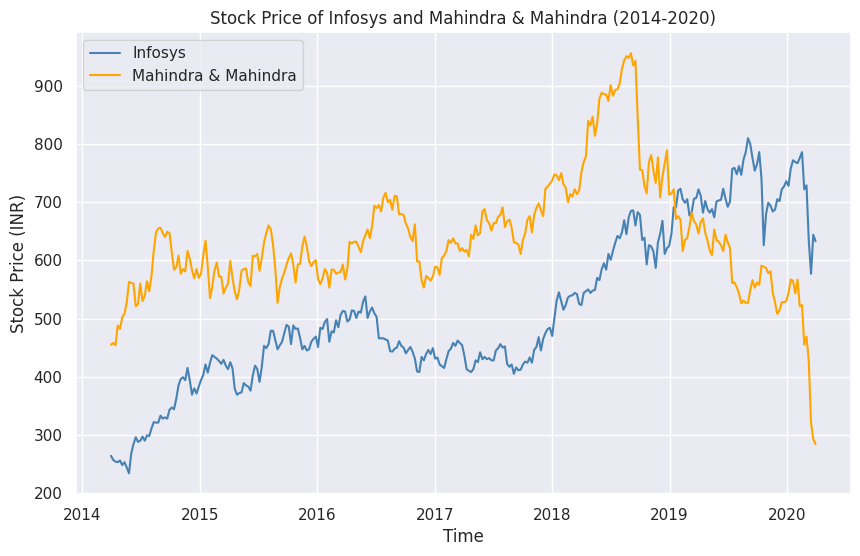

In [15]:
# Plotting stock prices for Infosys and Mahindra & Mahindra
plt.figure(figsize=(10,6))

# Infosys stock price vs time
plt.plot(df_stockdata['Stock_Date'], df_stockdata['Infosys'], label='Infosys', color='steelblue')

# Mahindra & Mahindra stock price vs time
plt.plot(df_stockdata['Stock_Date'], df_stockdata['Mahindra_Mahindra'], label='Mahindra & Mahindra', color='orange')

# Adding titles and labels
plt.title('Stock Price of Infosys and Mahindra & Mahindra (2014-2020)', fontsize=12)
plt.xlabel('Time')
plt.ylabel('Stock Price (INR)')
plt.legend()

# Display the plot
plt.show()

**Observations and Inferences:**

The graph above shows the stock prices of Infosys and Mahindra & Mahindra over the 6-year period from 2014 to 2020.

**Infosys:**
* **Steady Growth**: The stock shows a consistent upward trend over the years, indicating steady long-term growth.
* **Moderate Volatility**: While there are occasional sharp movements, the overall price trajectory remains upward, suggesting Infosys is a relatively stable stock.
* **Resilience**: The stock seems to recover well from any dips, indicating resilience to market fluctuations, particularly post pandamic market corrections.

**Mahindra & Mahindra:**
* **Cyclical Movements**: The stock shows distinct cycles of growth and correction, reflecting sensitivity to market or sector-specific factors.
* **Higher Volatility**: The stock experiences more pronounced price swings compared to Infosys, suggesting higher risk for short-term investors.
* **Long-term Stability**: Despite volatility, the overall price trend seems stable over the long term, making it a reasonable investment for those with a higher risk tolerance.

**Final Takeaway:**
- **Infosys** offers steady growth and moderate volatility, making it suitable for risk-averse, long-term investors.
- **Mahindra & Mahindra** is more volatile and cyclical, catering to investors willing to take on more risk for potentially higher returns.

## <a name='eda01'>Stock movement over time</a>

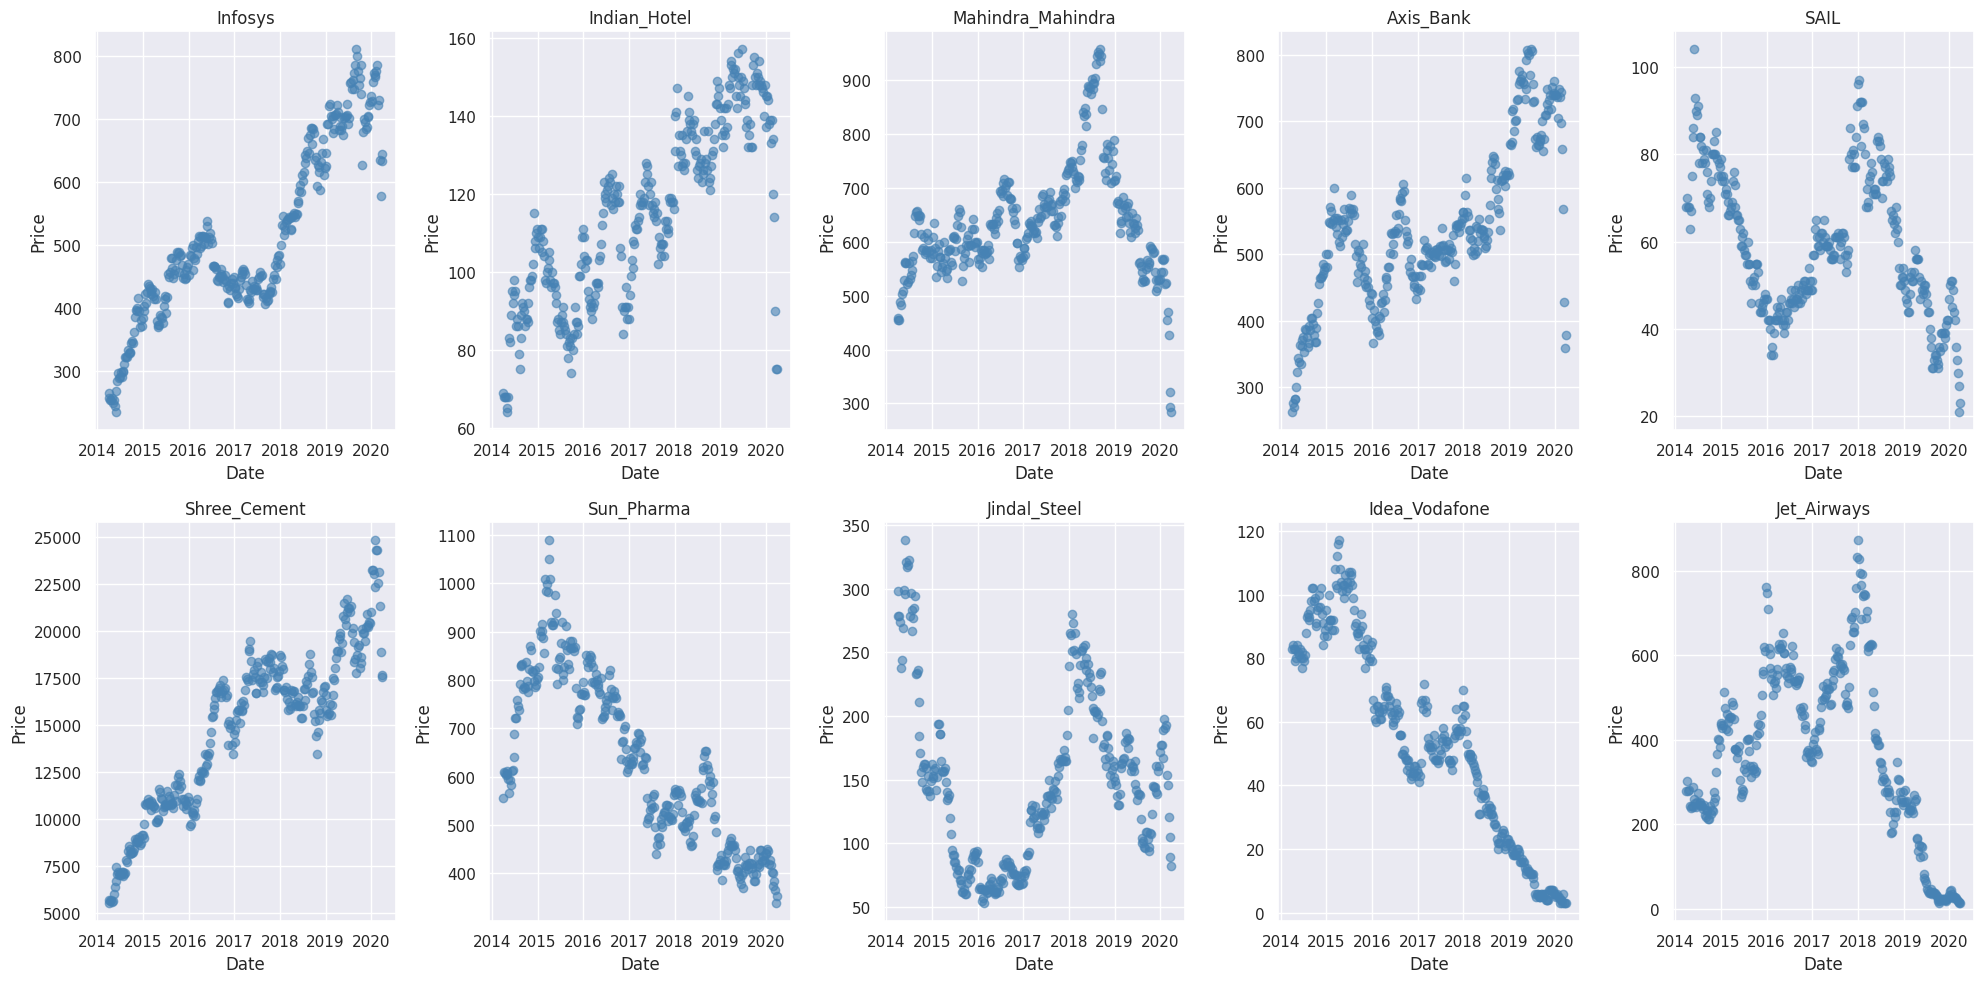

In [16]:
# Call the function with the loaded dataframe and date column
plot_stock_movement(df_stockdata, 'Stock_Date')

**Observations:**

The scatter plots above show the movement of stock prices for each stock over the time period from 2014 to 2020. Here are some quick observations:

* **Infosys**: There is a general upward trend with some periods of sharp fluctuations, indicating steady growth with some volatility.
* **Indian Hotel**: The stock shows more stability with smaller price fluctuations, reflecting gradual changes over time.
* **Mahindra & Mahindra**: The stock demonstrates periods of growth followed by corrections, suggesting cyclical performance with significant price shifts.
* **Axis Bank**: Similar to Mahindra, there are sharp upward and downward movements, reflecting volatility over time.
* **SAIL**: The stock price fluctuates within a narrow range, showing stability but with occasional large shifts towards the later periods.
* **Shree Cement**: The stock shows consistent growth, with a steep upward trend and higher volatility in the later years.
* **Sun Pharma**: The stock fluctuates significantly, with noticeable drops and recoveries, indicating high volatility.
* **Jindal Steel**: The stock shows large fluctuations, with sharp peaks and troughs, reflecting significant volatility.
* **Idea Vodafone**: The stock experiences a steady decline, especially in the later years, showing a downward trend.
* **Jet Airways**: The stock exhibits a sharp fall towards the later period, likely due to business troubles, indicating a dramatic decline.

These plots help in visualizing the volatility and trends for each stock over the period, giving insights into their performance patterns.

# <a name='ars'>Q2: Analyzing Returns on Stocks</a>

## Identify average returns for each stock using Logarithmic Scale

In [17]:
# Calculate Stock Returns using Logarithmic Scale
df_stock_returns = np.log(df_stockdata.drop(['Date','Stock_Date'],axis=1)).diff(axis = 0, periods = 1)

## Data Overview of Stock Returns Dataframe

In [18]:
# Display Dataframe Shape
print(f'The number of rows is {df_stock_returns.shape[0]},\nThe number of columns is {df_stock_returns.shape[1]}.')

The number of rows is 314,
The number of columns is 10.


In [19]:
# Display Top 5 Rows
df_stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


**Observations:**

* **Logarithmic Returns Stability**: Logarithmic returns provide a clearer representation of continuous compounding, offering a more accurate measure of return over time, particularly useful for long-term stock analysis.

* **Infosys and Shree Cement**: These stocks show **positive average log returns**, indicating consistent growth. Infosys has moderate but steady growth, while Shree Cement shows higher growth, consistent with its significant price increase.

* **Volatile Stocks**: Stocks like **Jet Airways** and **Idea Vodafone** show relatively lower or negative average log returns, reflecting poor long-term performance and significant volatility. This is in line with their observed price declines over the time period.

* **Riskier Stocks**: Stocks with higher volatility, such as **Jindal Steel** and **SAIL**, demonstrate fluctuating returns, indicating that these stocks are riskier investments over time, with periods of both high gains and losses.

* **Axis Bank and Sun Pharma**: Both stocks show moderate average log returns, indicating balanced growth with some volatility. This suggests they may provide reasonable long-term returns for investors with a moderate risk tolerance.

* **Compounding Effects**: The log return method effectively captures the compounding effects, making it useful in comparing returns over extended periods. Stocks with more frequent fluctuations (like Idea Vodafone) show lower compounded returns.

**Final Takeaway:**

Logarithmic returns indicate that **Shree Cement** and **Infosys** are strong performers over the long term, while stocks like **Jet Airways** and **Idea Vodafone** exhibit negative returns, signaling poor performance and higher risk.

# <a name='msd'>Q3: Means & Standard Deviations of Stock Returns</a>

### Calculating Stock Means

In [20]:
# Calculating the mean of returns on each stock
stock_mean_returns = df_stock_returns.mean()
print(f'Show Mean Returns of each Stock:')
stock_mean_returns

Show Mean Returns of each Stock:


,0
Infosys,0.002794
Indian_Hotel,0.000266
Mahindra_Mahindra,-0.001506
Axis_Bank,0.001167
SAIL,-0.003463
Shree_Cement,0.003681
Sun_Pharma,-0.001455
Jindal_Steel,-0.004123
Idea_Vodafone,-0.010608
Jet_Airways,-0.009548


### Calculating Stock Standard Deviation

In [21]:
# Calculating standard deviation returns for each stock
stock_stddev_returns = df_stock_returns.std()
print(f'Show Standard Deviation for Returns on each Stock:')
stock_stddev_returns

Show Standard Deviation for Returns on each Stock:


,0
Infosys,0.035070
Indian_Hotel,0.047131
Mahindra_Mahindra,0.040169
Axis_Bank,0.045828
SAIL,0.062188
Shree_Cement,0.039917
Sun_Pharma,0.045033
Jindal_Steel,0.075108
Idea_Vodafone,0.104315
Jet_Airways,0.097972


### Create Dataframe showing Average Returns and Standard Deviation for each Stock over-the-time.

In [22]:
# Display Average Returns and Standard Deviation (Volatility) for each Stock
df_stocktrend = pd.DataFrame({'Average_Returns':stock_mean_returns, 'Volatility': stock_stddev_returns})
df_stocktrend.sort_values(by = 'Volatility')

,Average_Returns,Volatility
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917
Mahindra_Mahindra,-0.001506,0.040169
Sun_Pharma,-0.001455,0.045033
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
SAIL,-0.003463,0.062188
Jindal_Steel,-0.004123,0.075108
Jet_Airways,-0.009548,0.097972
Idea_Vodafone,-0.010608,0.104315


**Observations:**
* **Shree Cement** and **Infosys** have positive means and relatively low standard deviations, indicating consistent growth with lower volatility.
* **Mahindra & Mahindra** and **Sun Pharma** show negative means with moderate standard deviations, suggesting underperformance with moderate risk.
* **Jet Airways** and **Idea Vodafone** have negative means and high standard deviations, reflecting poor performance and high volatility, making them riskier investments.
* **SAIL** and **Jindal Steel** have negative returns but high standard deviations, signaling high-risk stocks with uncertain returns.
* **Axis Bank** and **Indian Hotel** show balanced means and moderate standard deviations, suggesting stable, moderate-risk investments with potential for reasonable returns.

# <a name='psmsd'>Q4: Plot for Stock Means and Standard Deviation</a>

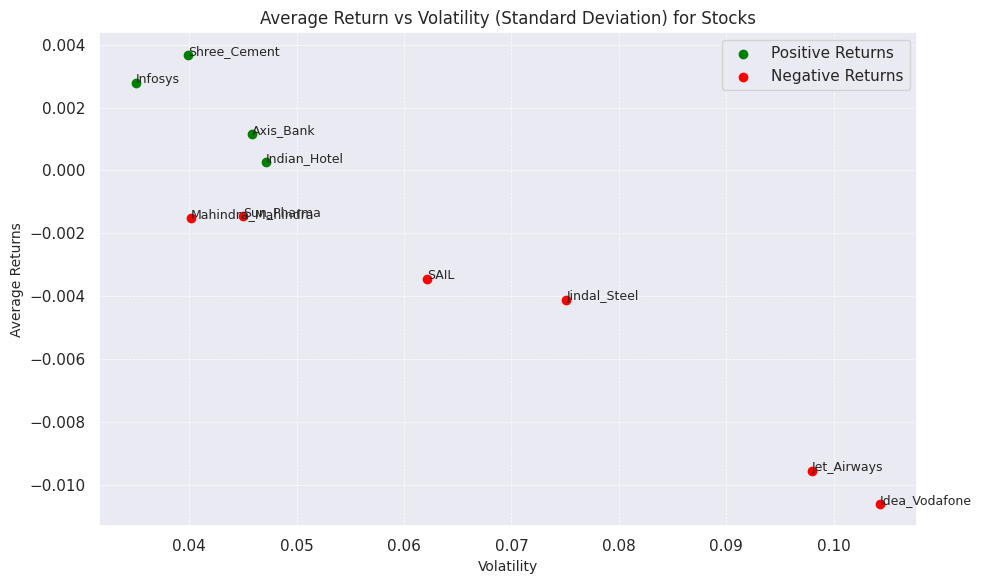

In [23]:
# Plotting Mean Returns vs Standard Deviation for all stocks
plt.figure(figsize=(10, 6))

# Segregating stocks with positive and negative returns
positive_returns = df_stocktrend[df_stocktrend['Average_Returns'] > 0]
negative_returns = df_stocktrend[df_stocktrend['Average_Returns'] <= 0]

# Plotting positive returns in green and negative returns in red
plt.scatter(positive_returns['Volatility'], positive_returns['Average_Returns'], color='green', label='Positive Returns')
plt.scatter(negative_returns['Volatility'], negative_returns['Average_Returns'], color='red', label='Negative Returns')

# Adding labels for each stock
for stock in df_stocktrend.index:
    plt.text(df_stocktrend['Volatility'][stock], df_stocktrend['Average_Returns'][stock], stock, fontsize=9)

# Adding gridlines for better visual comparison
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Titles and labels
plt.title('Average Return vs Volatility (Standard Deviation) for Stocks', fontsize=12)
plt.xlabel('Volatility', fontsize=10)
plt.ylabel('Average Returns', fontsize=10)

# Adding a legend to differentiate positive and negative return stocks
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

**Observations:**

* Stocks with higher **volatility** (e.g., **Idea Vodafone**, **Jet Airways**) tend to have lower or negative returns, highlighting their risky nature.
* **Shree Cement** and **Infosys** are positioned with higher means and lower volatility, making them attractive for long-term, risk-averse investors.
* The plot shows a clear distinction between low-risk, stable stocks (e.g., **Infosys**) and high-risk, volatile stocks (e.g., **Jindal Steel**).
* Moderate-risk stocks like **Axis Bank** occupy middle ground, offering a balanced risk-return profile suitable for investors with moderate risk tolerance.

**Final Takeaway:**
* **Low-risk, high-return investments** are **Shree Cement** and **Infosys**, while **Jet Airways** and **Idea Vodafone** exhibit high-risk, poor returns.
* The **risk-return trade-off** is clearly demonstrated, where higher volatility typically correlates with lower or negative returns in this dataset, suggesting investors should carefully consider both factors before making decisions.

# <a name='cr'>Q5: Conclusion and Business Recommendations</a>

## Conclusion

1. **Top Performers**:
   - **Shree Cement** and **Infosys** show strong positive average returns (0.00368 and 0.00279, respectively) with relatively low volatility (0.0399 and 0.0350). These stocks have been consistent performers with moderate risk, aligning with the objective of finding stable, high-return investments.
   
2. **Moderate Performers**:
   - **Axis Bank** and **Indian Hotel** show modest but positive average returns (0.00117 and 0.00027, respectively), with slightly higher volatility. These stocks offer a reasonable balance between risk and return, making them suitable for moderate-risk investors seeking steady growth.

3. **Negative Returns, Moderate Risk**:
   - **Mahindra & Mahindra**, **Sun Pharma**, and **SAIL** have negative returns (-0.0015, -0.0014, -0.0035) despite having moderate volatility. This suggests these stocks have underperformed over the period, but the risk is relatively low compared to more volatile stocks.
   
4. **High-Risk, Low-Performing Stocks**:
   - **Jindal Steel**, **Jet Airways**, and **Idea Vodafone** show significantly negative returns, with very high volatility, indicating these stocks are high-risk with poor performance. **Idea Vodafone** (-0.0106) and **Jet Airways** (-0.0095) have the highest volatility (0.1043 and 0.0979), and their negative returns make them unattractive for risk-averse investors.

5. **Volatility and Risk**:
   - Stocks with the highest volatility, like **Idea Vodafone** and **Jet Airways**, experienced both the highest price swings and the worst performance in terms of average returns. High volatility has not translated into higher returns, emphasizing the importance of balancing risk with expected rewards.

6. **Logarithmic Returns Insight**:
   - The use of logarithmic returns provides a clearer view of the compounded growth and volatility over time. This method is particularly helpful in understanding the performance of long-term investments, reinforcing that **Infosys** and **Shree Cement** have been the most stable growth-oriented stocks in the long run.

7. **Low Volatility, Positive Returns**:
   - The stocks with the lowest volatility, such as **Infosys** and **Shree Cement**, have also generated the highest positive returns, highlighting the attractiveness of these stocks for long-term, risk-averse investors.

8. **Impact of Market Conditions**:
   - Negative returns for **Mahindra & Mahindra**, **Sun Pharma**, and **SAIL** suggest that market conditions during the analysis period may have affected certain sectors negatively. These stocks could still offer potential upside in future periods depending on sector recovery.

## Business Recommendations

1. **Focus on Stable, High-Performing Stocks**:
   - **Shree Cement** and **Infosys** are the top recommendations due to their strong average returns and relatively low volatility. These stocks are well-suited for long-term investors seeking stability with moderate growth potential.

2. **Avoid High-Risk, Low-Return Stocks**:
   - Stocks like **Idea Vodafone**, **Jet Airways**, and **Jindal Steel** should be avoided by risk-averse investors. Their high volatility coupled with negative returns indicates poor performance and increased risk, which may not align with the objective of reducing market risk exposure.

3. **Monitor Moderate Performers**:
   - **Axis Bank** and **Indian Hotel** present a balanced risk-return profile and may offer reasonable investment opportunities for those seeking moderate growth. While their returns are lower than **Shree Cement** and **Infosys**, they provide a stable growth trajectory.

4. **Sector Diversification**:
   - The underperformance of stocks like **Sun Pharma** and **Mahindra & Mahindra** suggests that some sectors may face short-term challenges. However, diversification across different sectors can help mitigate such risks in the future.

5. **Periodic Risk Reassessment**:
   - Regular reassessment of stock performance and market conditions is essential to ensure that selected stocks align with the risk-return profile of the investor. The use of logarithmic returns can help capture the compounding effects of both gains and losses over time.

6. **Risk Mitigation**:
   - For conservative investors, focus on low-volatility stocks that still offer positive returns. Avoid high-volatility, negative-return stocks unless there is a specific turnaround strategy in play.

7. **Strategic Exit Points**:
   - For stocks with negative returns but moderate volatility, such as **Mahindra & Mahindra** and **Sun Pharma**, investors should evaluate potential exit points unless these companies show clear signs of recovery.

8. **Continuous Monitoring for Recovery**:
   - Keep a close watch on stocks like **Mahindra & Mahindra** and **Sun Pharma** for signs of recovery, as they have moderate volatility and may present buying opportunities if the market conditions improve.